In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
import re

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
df.shape

(5728, 2)

In [9]:
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [11]:
punc_remove_data = df['text'].apply(preprocess_text)

In [13]:
punc_remove_data.sample(5)

4176    subject enron cover letter resume for dave ger...
2833    subject meeting with mr sud rebecca as we had ...
4490    subject re portcalc methodology keith both pow...
2182    subject re fw energy book promotion thanks ori...
179     subject get me thru july newsletter the get me...
Name: text, dtype: object

In [15]:
vectorizer = CountVectorizer()

In [17]:
X_bow = vectorizer.fit_transform(punc_remove_data)

In [19]:
X_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 708380 stored elements and shape (5728, 37303)>

In [21]:
X = X_bow
y = df['spam']

In [23]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=34)

In [25]:
model = LogisticRegression()

In [27]:
model.fit(X_train , y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test ,y_pred )
conf_matrix = confusion_matrix(y_test , y_pred)
class_report = classification_report(y_test , y_pred)

In [33]:
accuracy

0.987783595113438

In [35]:
conf_matrix

array([[874,   7],
       [  7, 258]], dtype=int64)

In [37]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       881\n           1       0.97      0.97      0.97       265\n\n    accuracy                           0.99      1146\n   macro avg       0.98      0.98      0.98      1146\nweighted avg       0.99      0.99      0.99      1146\n'

In [39]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)

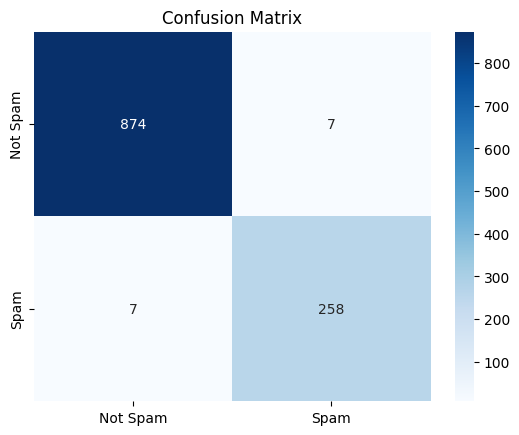

In [41]:
sns.heatmap(cm, annot=True,fmt= 'd', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.show()

In [43]:
def predict_email(email):
    processed_text = preprocess_text(email)
    email_vector = vectorizer.transform([processed_text])
    pred = model.predict(email_vector)
    if pred == 1:
        return "Given Email is spam"
    else:
        return "It is not spam"

In [49]:
user_input = input("Enter the email here:")
result = predict_email(user_input)
result

Enter the email here: hey you have won a iphone click this link!!!! and claim your prize


'Given Email is spam'